# **NAME : Shivakumar R Hombal**

##**Task-2 - Prediction using Unsupervised ML**

##**The aim of this task is to predict the optimum number of clusters and representing it visually for given 'Iris' dataset**

###**The below code block is used to import all the necessary libraries to develope a Unsupervised Machine Learning model**

In [40]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

##**Importing the dataset**

In [41]:
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


##**To check if the data contains null values**

In [42]:
data = pd.read_csv('Iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##**To see the columns of the dataset**

In [43]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

##**Removing unrequired data**

In [44]:
data.drop('Id', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##**Check for duplicate values**

In [45]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [46]:
data.duplicated().sum()

3

##**Removing duplicate values**

In [47]:
data.drop_duplicates(inplace= True)
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##**To find correlation between columns**

In [48]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


##**Preparing the dataset and Scaling**

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_df = sc.fit_transform(data.iloc[:,[0,1,2,3]])
std = pd.DataFrame(std_df)
std

,0,1,2,3
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682
143,0.536792,-1.276136,0.695748,0.915085
144,0.778842,-0.128082,0.809831,1.047484
145,0.415766,0.790361,0.923913,1.444682


In [50]:
kmean = KMeans()
kmean.fit(std.iloc[:,[0,1,2,3]]) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
kmean.cluster_centers_

array([[-0.37954125, -1.40734186,  0.09545678, -0.01170877],
       [-0.97602203,  0.91664658, -1.31210392, -1.22978071],
       [ 0.43226987, -0.629051  ,  0.81501608,  0.83684926],
       [-1.4298661 , -0.05632882, -1.361302  , -1.34397496],
       [ 0.35316727, -0.151835  ,  0.38890544,  0.28504789],
       [ 1.1482867 ,  0.5003261 ,  1.09203458,  1.36802948],
       [-0.56251966,  1.99581694, -1.28643536, -1.23640067],
       [ 1.94370815, -0.38639422,  1.43728424,  1.06403412]])

##**Determining the optimal value of k for clusters**

In [52]:
x = data.iloc[:, [0,1,2,3]].values
wcss =[]
for cluster in range(1,10):
    kmeans= KMeans(n_clusters = cluster)
    kmeans.fit(std)
    wcss.append(kmeans.inertia_)
wcss

[588.0,
 220.8590794074236,
 138.2577113311786,
 112.90751031641204,
 89.88758954783327,
 79.74186358893864,
 71.08662595805589,
 61.962665996472126,
 56.840764689723]

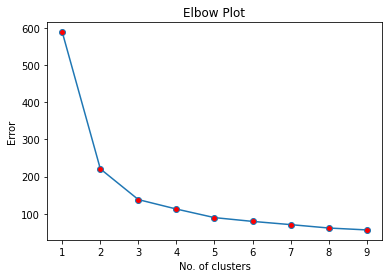

In [53]:
plt.plot(range(1,10), wcss, marker= 'o', markerfacecolor= 'red')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.title('Elbow Plot')
plt.show()

###**From the above graph we can see that the optimal number of cluster could be formed is 3**

##**Applying Data Fitting and applying K-Means Clustering with cluster value = 3**

In [54]:
kmeans= KMeans(n_clusters= 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred= kmeans.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [55]:
data['cluster']= kmean.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,3
2,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,5
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,5


In [56]:
data['cluster'].value_counts(),data['Species'].value_counts()

(4    29
 2    22
 0    21
 1    20
 5    19
 3    16
 6    12
 7     8
 Name: cluster, dtype: int64, Iris-versicolor    50
 Iris-virginica     49
 Iris-setosa        48
 Name: Species, dtype: int64)

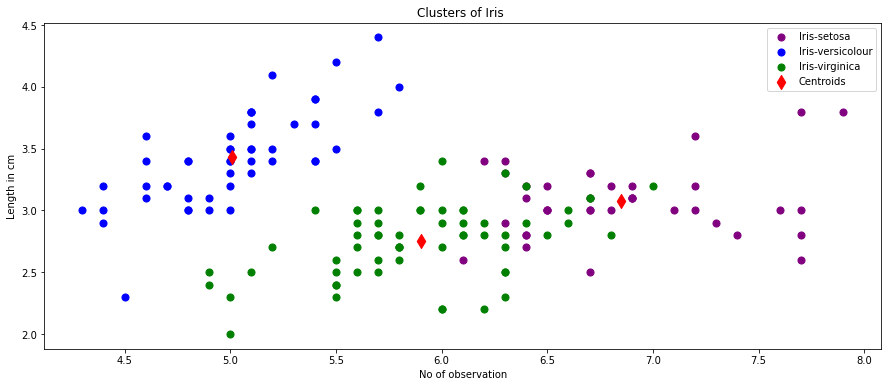

In [57]:
plt.figure(figsize = (15,6))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker='d', c = 'red', label = 'Centroids')
plt.title('Clusters of Iris ')
plt.xlabel('No of observation')
plt.ylabel('Length in cm')
plt.legend()
plt.show()

#**From the above plotted graph, we can see the centroids of the clusters, thus  achieved our goal.**